# Load libraries

In [1]:
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define Training Dataset

In [2]:
x1 = np.array([0, 5, 15, 25, 35, 45, 55, 60])
x2 = np.array([1, 1, 2, 5, 11, 15, 24, 35])
y = np.array([4, 5,  20, 14, 32, 22, 38, 43])

# Create x array using x1 and x2 in dataset
##### 1st point comes from x1, 2nd point comes from x2
##### should get [(0,1), (5,1), (15,2) ... etc

In [4]:
x = np.stack(
    (x1, x2), axis=-1
)
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 24]
 [60 35]]


# Create Model

In [5]:
model = LinearRegression().fit(x, y)

# Create New Dataset

In [6]:
points_on_line = 40
x1_new, x2_new = zip(
    *product(
        np.linspace(min(x1), max(x1), points_on_line),
        np.linspace(min(x2), max(x2), points_on_line)
    )
)

x_new = np.stack(
    (x1_new, x2_new), axis=-1
)

# Determine Predicted y values using x_new

In [7]:
y_predicted = model.predict(x_new)

# Plot the Data

##### Initialize the figure

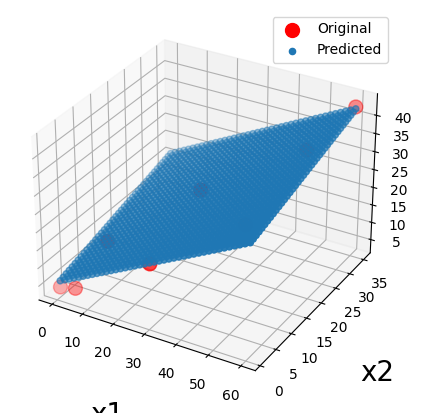

In [8]:
fig = plt.figure(figsize = (5, 5))
axis = fig.add_subplot(projection = '3d')   
axis.set_xlabel('x1', fontsize = 20, labelpad = 20)  
axis.set_ylabel('x2', fontsize = 20, labelpad = 20)  
axis.set_zlabel('y', fontsize = 20, labelpad = 5)  


# plot dataset with original values
axis.scatter(x1, x2, y, color='red', s=100, label='Original') 

# plot dataset with predicted values
axis.scatter(x1_new, x2_new, y_predicted, label='Predicted') 

# show legend
axis.legend()

In [9]:
import os
import shutil
import imageio.v2 as imageio


# make directory
dir = 'rotate_plot_example'
os.makedirs(dir, exist_ok=True)


# create image files
filenames = []
for angle in range(0, 360, 1):
    filename = f'{dir}/gif_iamge{angle}.png'
    filenames.append(filename)
    
    # update figure
    axis.view_init(elev=32, azim=angle)
    
    # save figure
    fig.savefig(filename)
    
    
# combine images as gif
images = []
for f in filenames:
    images.append(imageio.imread(f))
    
imageio.mimsave('create-rotation.gif', images)    

# remove intermediate images
shutil.rmtree(dir)

# Scikit Learn Regression Plot (With Matrix Movie Bullet-Time Rotation)
###### If image doesn't show after gif creation, refesh the Jupyter Notebook
![chart](static/create-rotation.gif "chart")